# **1. choose a data**

In [ ]:
from google.colab import files
uploaded = files.upload()
import os
os.listdir()
import pandas as pd
import numpy as np

Saving adhd_data.csv to adhd_data.csv


In [ ]:
Adhd_df = pd.read_csv("adhd_data.csv")
Adhd_df.info()
Adhd_df.head(6500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           6500 non-null   int64  
 1   Gender                        6500 non-null   int64  
 2   Educational_Level             6500 non-null   object 
 3   Family_History                6500 non-null   object 
 4   Sleep_Hours                   6500 non-null   int64  
 5   Daily_Activity_Hours          6500 non-null   int64  
 6   Q1_1                          6500 non-null   int64  
 7   Q1_2                          6500 non-null   int64  
 8   Q1_3                          6500 non-null   int64  
 9   Q1_4                          6500 non-null   int64  
 10  Q1_5                          6500 non-null   int64  
 11  Q1_6                          6500 non-null   int64  
 12  Q1_7                          6500 non-null   int64  
 13  Q1_

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Q2_8,Q2_9,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels
0,8,1,Primary,No,8,7,0,0,0,1,...,0,1,0,2,0.5,0,5,1,0,0
1,9,2,Primary,No,11,7,3,2,2,3,...,2,3,3,2,0.9,1,6,0,1,3
2,9,1,Primary,No,9,5,3,2,3,3,...,2,3,3,2,1.4,1,3,0,1,3
3,5,2,Kindergarten,Yes,7,11,3,3,3,2,...,0,0,2,6,0.6,1,6,0,1,1
4,13,1,Middle,No,3,0,3,2,3,3,...,1,0,2,4,1.0,1,5,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,5,1,Kindergarten,No,3,5,0,1,1,1,...,2,3,1,6,0.8,0,5,0,0,0
6496,4,2,Kindergarten,Yes,7,1,3,2,3,3,...,3,2,3,2,1.4,1,3,0,1,3
6497,7,1,Primary,No,8,1,1,1,1,0,...,2,3,1,3,0.6,0,5,0,0,2
6498,3,2,Kindergarten,No,11,5,2,3,3,3,...,3,3,3,3,0.5,1,5,2,0,2


# **2.define your research questions :**

1-What is the age distribution of the participants, and are there any noticeable concentration patterns?

2-What is the distribution of the different ADHD diagnosis classes within the dataset?

3-What is the prevalence of learning difficulties among individuals diagnosed with the three ADHD subtypes?

4-How does task-organization difficulties vary among the different ADHD subtypes?

5-How are sleep hours distributed among participants & Are there differences in average sleep hours between males and females?

6-Does the focus score during video-watching differ across the ADHD diagnosis classes?

7-Does having a family history of ADHD influence the diagnosis class of the individual?

8-How does daily activity level vary across different anxiety severity categories?

9-Is there agreement between the self-assessment (Q1) and the observer assessment (Q2), or are there noticeable differences?

# **3.data cleaning and preprocessing :**

In [ ]:
Adhd_df.isnull().sum()

,0
Age,0
Gender,0
Educational_Level,0
Family_History,0
Sleep_Hours,0
Daily_Activity_Hours,0
Q1_1,0
Q1_2,0
Q1_3,0
Q1_4,0


In [ ]:
Adhd_df = Adhd_df.drop_duplicates()
print("rows number after duplication removing:", Adhd_df.shape[0])

rows number after duplication removing: 6500


In [ ]:
Adhd_df['gender_code'] = Adhd_df['Gender'].map({1:'male' , 2:'female'})
Adhd_df['diagnosis_stage'] = Adhd_df['Diagnosis_Class'].map({0:'No ADHD',1:'Inattentive type',2:'Hyperactive-Impulsive type',3:'Combined type'})
Adhd_df['Anxiety_label'] = Adhd_df['Anxiety_Depression_Levels'].map({0:'No Anxiety/Depression',1:'Mild',2:'Moderate',3:'Severe'})
Adhd_df['Q1_avg'] = Adhd_df[[f'Q1_{i}' for i in range(1,10)]].mean(axis=1)
Adhd_df['Q2_avg'] = Adhd_df[[f'Q2_{i}' for i in range(1,10)]].mean(axis=1)
Adhd_df

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,gender_code,diagnosis_stage,Anxiety_label,Q1_avg,Q2_avg
0,8,1,Primary,No,8,7,0,0,0,1,...,0,5,1,0,0,male,No ADHD,No Anxiety/Depression,0.444444,0.666667
1,9,2,Primary,No,11,7,3,2,2,3,...,1,6,0,1,3,female,Combined type,Severe,2.333333,2.666667
2,9,1,Primary,No,9,5,3,2,3,3,...,1,3,0,1,3,male,Combined type,Severe,2.555556,2.333333
3,5,2,Kindergarten,Yes,7,11,3,3,3,2,...,1,6,0,1,1,female,Hyperactive-Impulsive type,Mild,2.555556,0.333333
4,13,1,Middle,No,3,0,3,2,3,3,...,1,5,1,1,2,male,Hyperactive-Impulsive type,Moderate,2.555556,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,5,1,Kindergarten,No,3,5,0,1,1,1,...,0,5,0,0,0,male,Inattentive type,No Anxiety/Depression,0.888889,2.222222
6496,4,2,Kindergarten,Yes,7,1,3,2,3,3,...,1,3,0,1,3,female,Combined type,Severe,2.666667,2.333333
6497,7,1,Primary,No,8,1,1,1,1,0,...,0,5,0,0,2,male,Inattentive type,Moderate,0.666667,2.555556
6498,3,2,Kindergarten,No,11,5,2,3,3,3,...,1,5,2,0,2,female,Combined type,Moderate,2.555556,2.555556


# **4.Data Exploration and Visualization :**

**bold text**# **4.A-Descriptive Statistics**

In [ ]:
Adhd_df.describe()

,Age,Gender,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,...,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,Q1_avg,Q2_avg
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,...,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,11.489846,1.400000,7.521077,4.750615,1.679846,1.683385,1.693846,1.679385,1.683538,1.682923,...,1.776923,3.558615,1.025615,0.715692,4.371846,0.734308,0.553077,1.085385,1.685060,1.682821
std,8.238000,0.489936,1.874674,3.386857,1.108428,1.098783,1.110924,1.102518,1.100856,1.097599,...,1.235878,1.823099,0.725909,0.451119,2.122508,1.422250,0.497213,1.056316,0.997182,0.999533
min,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,0.600000,0.000000,3.000000,0.000000,0.000000,0.000000,0.555556,0.555556
50%,10.000000,1.000000,8.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,0.900000,1.000000,4.000000,0.000000,1.000000,1.000000,2.333333,2.333333
75%,14.000000,2.000000,9.000000,7.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,5.000000,1.300000,1.000000,6.000000,1.000000,1.000000,2.000000,2.555556,2.555556
max,55.000000,2.000000,12.000000,12.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,10.000000,4.000000,1.000000,10.000000,6.000000,1.000000,3.000000,3.000000,3.000000


In [ ]:
zero_count = Adhd_df[Adhd_df['Daily_Activity_Hours'] == 0].shape[0]
zero_count

989

In [ ]:
total_rows = Adhd_df.shape[0]
percentage_zero = (zero_count / total_rows) * 100
percentage_zero

15.215384615384616

In [ ]:
mean_value = Adhd_df.loc[Adhd_df['Daily_Activity_Hours'] != 0, 'Daily_Activity_Hours'].mean()

Adhd_df['Daily_Activity_Hours'] = Adhd_df['Daily_Activity_Hours'].replace(0, mean_value)

print("Mean used:", mean_value)

Mean used: 5.603157321720196


In [ ]:
Adhd_df['Daily_Activity_Hours'].describe()

,Daily_Activity_Hours
count,6500.000000
mean,5.603157
std,2.723983
min,1.000000
25%,5.000000
50%,5.603157
75%,7.000000
max,12.000000


In [ ]:
print("mean (Diagnosis Class):", round(Adhd_df['Diagnosis_Class'].mean(), ndigits=2))
print("Median (Age):", round(Adhd_df['Age'].median(), ndigits=2))
print("Median (Sleep Hours):", round(Adhd_df['Sleep_Hours'].median(),ndigits=2))
print("Standard Deviation (Sleep Hours):", round(Adhd_df['Sleep_Hours'].std(),ndigits=2))
print("Minimum age:", Adhd_df['Age'].min())
print("Maximum age:", Adhd_df['Age'].max())
print("Mode (Gender):", Adhd_df['Gender'].mode()[0])

mean (Diagnosis Class): 1.78
Median (Age): 10.0
Median (Sleep Hours): 8.0
Standard Deviation (Sleep Hours): 1.87
Minimum age: 3
Maximum age: 55
Mode (Gender): 1


In [ ]:
gender_freq_df=pd.crosstab(index=Adhd_df.gender_code,columns=['count'],colnames=['Gender'],margins=True)
gender_freq_df

Gender,count,All
gender_code,,
female,2600,2600
male,3900,3900
All,6500,6500


# **4.B- visualizations**

In [ ]:
import plotly.graph_objects as go
numeric_df = Adhd_df.select_dtypes(include='number')

fig = go.Figure()
fig.add_trace(go.Heatmap(
    z=numeric_df.corr(),
    x=numeric_df.columns,
    y=numeric_df.columns))

fig.update_layout(title="Adhd Correlation Heatmap")
fig.show()

# **B.1- what is the age distribution of the participants, and are there any niticable concentration patterns?**

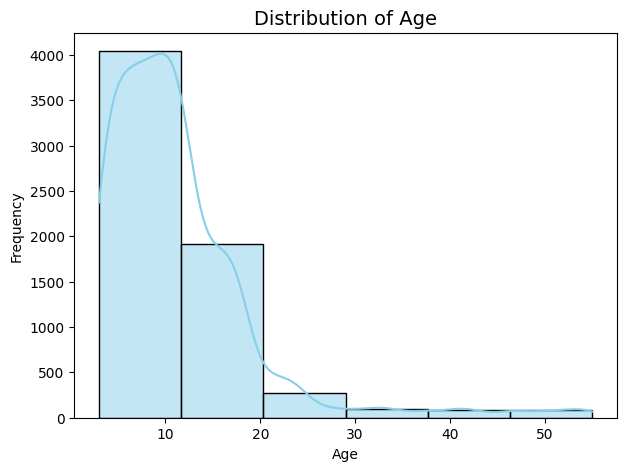

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.histplot(Adhd_df['Age'], bins=6,kde=True, color='skyblue')
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# **B.2- what is the different ADHD diagnosis classes within the dataset?**

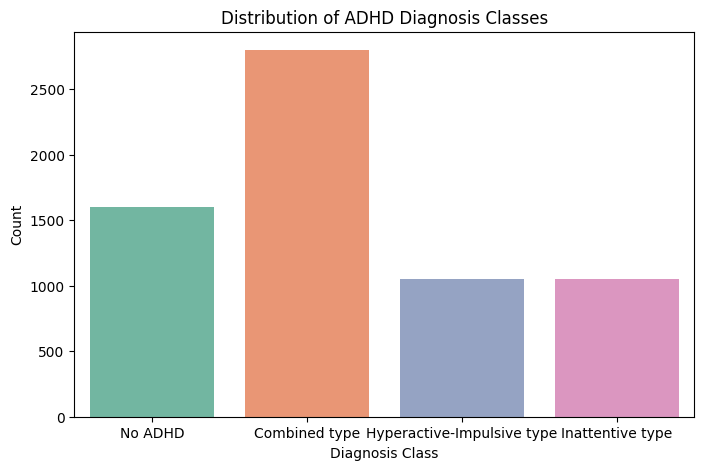

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis_stage', data=Adhd_df, hue='diagnosis_stage', palette='Set2', legend=False)
plt.title("Distribution of ADHD Diagnosis Classes")
plt.xlabel("Diagnosis Class")
plt.ylabel("Count")
plt.show()

In [ ]:
diagnosis_freq_df=pd.crosstab(index=Adhd_df.diagnosis_stage,columns=['count'],colnames=['diagnosis_stage'],margins=True)
diagnosis_freq_df

diagnosis_stage,count,All
diagnosis_stage,,
Combined type,2800,2800
Hyperactive-Impulsive type,1050,1050
Inattentive type,1050,1050
No ADHD,1600,1600
All,6500,6500


# **-The percentage of the 3 classes of ADHD that have learning difficulties**

In [ ]:
import pandas as pd

Adhd_df = Adhd_df[Adhd_df['diagnosis_stage'].isin([
    'Inattentive type',
    'Hyperactive-Impulsive type',
    'Combined type'])]

ld_1_count = Adhd_df[Adhd_df['Learning_Difficulties'] == 1].shape[0]

total_Adhd_count = Adhd_df.shape[0]

percentage = (ld_1_count / total_Adhd_count) * 100

print("Percentage of ADHD patients (3 types) with learning difficulties = 1:")
print(f"{percentage:.2f}%")

Percentage of ADHD patients (3 types) with learning difficulties = 1:
65.61%


# **B.3- What is the prevalence of learning difficulties among individuals diagnosed with the 3 ADHD subtypes?**

/tmp/ipython-input-435051032.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




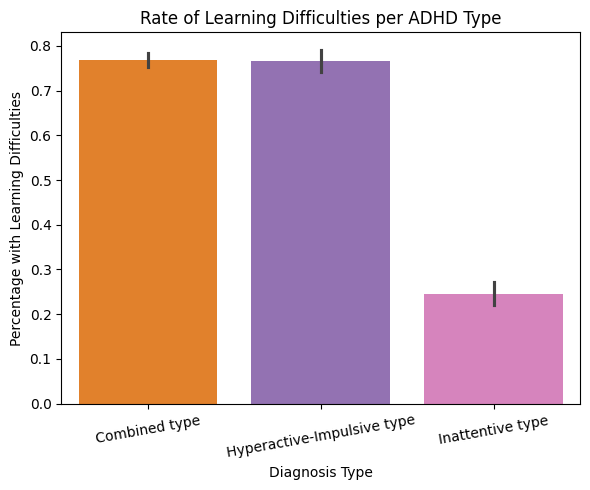

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
palette={'Combined type':'#ff7f0e','Hyperactive-Impulsive type':'#9467bd','Inattentive type':'#e377c2'}
sns.barplot(x='diagnosis_stage',y='Learning_Difficulties',data=Adhd_df,palette=palette)
plt.title("Rate of Learning Difficulties per ADHD Type")
plt.ylabel("Percentage with Learning Difficulties")
plt.xlabel("Diagnosis Type")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# **B.4- How do Task-organization difficulties vary among the different ADHD subtypes?**

In [ ]:
import pandas as pd

Adhd_df = Adhd_df[Adhd_df['diagnosis_stage'].isin([
    'Inattentive type',
    'Hyperactive-Impulsive type',
    'Combined type'])]
ld_1_count = Adhd_df[Adhd_df['Difficulty_Organizing_Tasks'] == 1].shape[0]
total_Adhd_count = Adhd_df.shape[0]
percentage = (ld_1_count / total_Adhd_count) * 100
print("Percentage of ADHD patients (3 types) with organizing task difficulties = 1:")
print(f"{percentage:.2f}%")

Percentage of ADHD patients (3 types) with organizing task difficulties = 1:
85.29%


In [ ]:
Adhd_df.groupby('diagnosis_stage')['Difficulty_Organizing_Tasks'].mean() * 100

,Difficulty_Organizing_Tasks
diagnosis_stage,
Combined type,100.000000
Hyperactive-Impulsive type,100.000000
Inattentive type,31.333333


# **B.5- How are sleep hours distributed among participants & are there differences in average sleep hours between males and females?**

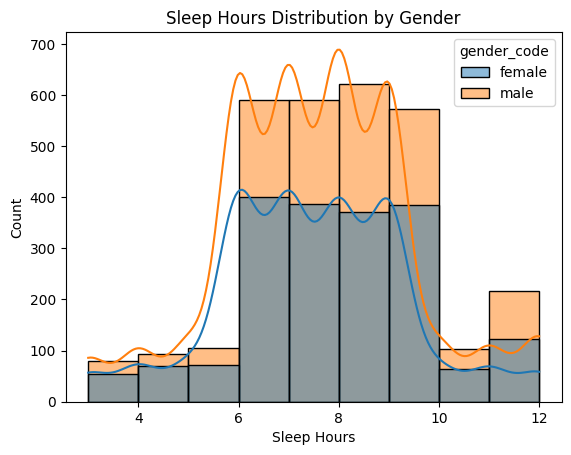

In [ ]:
import seaborn as sns

sns.histplot(data=Adhd_df, x='Sleep_Hours', hue='gender_code', kde=True, bins=9)
plt.title("Sleep Hours Distribution by Gender")
plt.xlabel("Sleep Hours")
plt.ylabel("Count")
plt.show()

# **B.6- Does the focus during video-watching differ across the ADHD diagnosis classes?**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

for cls in Adhd_df['diagnosis_stage'].unique():
    fig.add_trace(go.Box(name=f'{cls}',
        y=Adhd_df.loc[Adhd_df['diagnosis_stage'] == cls, 'Focus_Score_Video'],boxmean='sd'))

fig.update_layout(
    title="Focus Score by Diagnosis Class",
    xaxis_title="diagnosis_stage",
    yaxis_title="Focus Score",width=900,height=600)

fig.show()

In [ ]:
combined_outliers = Adhd_df[
    (Adhd_df['diagnosis_stage'] == 'Combined type') &
    ((Adhd_df['Focus_Score_Video'] < 1) | (Adhd_df['Focus_Score_Video'] > 9))]
combined_outliers

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,gender_code,diagnosis_stage,Anxiety_label,Q1_avg,Q2_avg
1045,6,1,Primary,Yes,8,5.000000,2,2,3,3,...,1,10,0,1,1,male,Combined type,Mild,2.666667,2.222222
2540,6,1,Primary,No,8,5.603157,2,2,3,2,...,1,10,0,1,1,male,Combined type,Mild,2.555556,2.666667
3119,4,1,Kindergarten,Yes,6,5.000000,3,3,2,2,...,1,10,0,0,3,male,Combined type,Severe,2.444444,2.555556
5812,6,2,Primary,No,8,2.000000,2,2,2,3,...,1,10,0,1,3,female,Combined type,Severe,2.333333,2.555556


In [ ]:
hyper_outliers = Adhd_df[
    (Adhd_df['diagnosis_stage'] == 'Hyperactive-Impulsive type') &
    ((Adhd_df['Focus_Score_Video'] < 1) | (Adhd_df['Focus_Score_Video'] > 9))]
hyper_outliers

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,gender_code,diagnosis_stage,Anxiety_label,Q1_avg,Q2_avg
798,5,1,Kindergarten,No,9,5.0,3,2,2,3,...,1,10,0,1,3,male,Hyperactive-Impulsive type,Severe,2.444444,0.333333
1662,25,1,University,Yes,6,7.0,2,3,3,3,...,1,10,0,1,1,male,Hyperactive-Impulsive type,Mild,2.555556,0.333333
4248,16,2,Secondary,No,8,5.0,3,2,2,3,...,1,10,2,1,0,female,Hyperactive-Impulsive type,No Anxiety/Depression,2.666667,0.555556


# **B.7- Does having family history of ADHD influence the diagnosis class of the individuals? (From Tableau)**

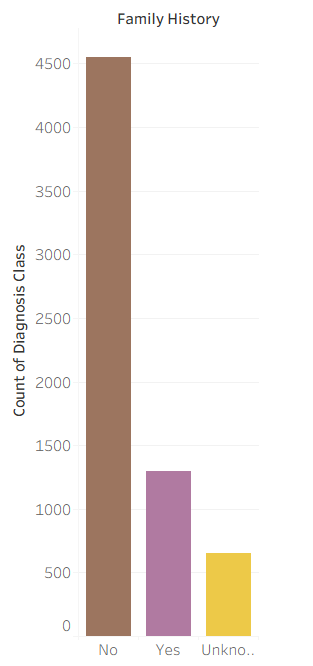

# **B.8- How does daily activity level vary across different anxiety severity categories? (From Tableau)**

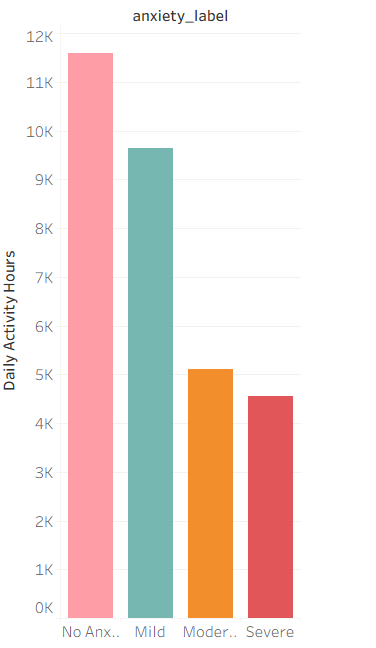

# **B.9- Is there agreement between the self-assessment (Q1) & the observer assessment (Q2), or are there noticable diffirences?**

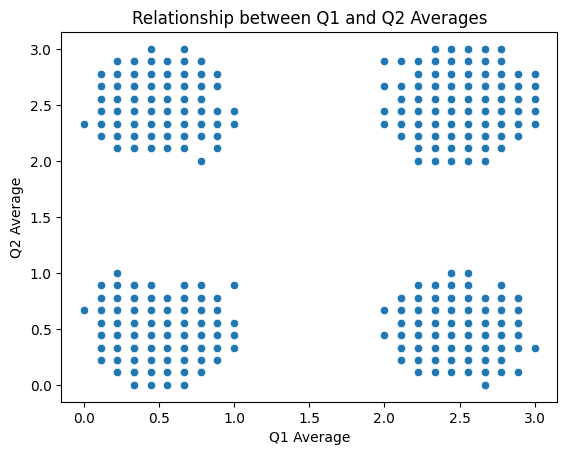

In [ ]:
sns.scatterplot(x='Q1_avg', y='Q2_avg', data=Adhd_df)
plt.title("Relationship between Q1 and Q2 Averages")
plt.xlabel("Q1 Average")
plt.ylabel("Q2 Average")
plt.show()

In [ ]:
Adhd_df.drop(['Daily_Coffee_Tea_Consumption',
              'Daily_Phone_Usage_Hours','Daily_Walking_Running_Hours'],
             axis=1,
             errors='ignore',
             inplace=True)
print("Features Number :", Adhd_df.shape[1])

Features Number : 34
